<a href="https://colab.research.google.com/github/HugoMagos0725/Matematicas_financieras/blob/main/Vasicek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime 
import numpy as np
from scipy import optimize
from scipy.integrate import odeint

from google.colab import drive 
drive.mount('/content/drive')

df=pd.read_csv('/content/drive/MyDrive/HistoricalPrices.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
tiempo=list(range(len(df['Date'])))
datos=df[' Open'].astype(float)[::-1]
datos.index=range(256)
datos

0      0.838
1      0.825
2      0.907
3      0.915
4      0.948
       ...  
251    5.032
252    5.148
253    5.212
254    5.230
255    5.225
Name:  Open, Length: 256, dtype: float64

In [3]:
dt=1/365

def costo(x):
  a=x[0]
  b=x[1]
  sigma=x[2]
  def Vasicek(y,t,a,b,sigma):
    R=np.zeros(256)
    R[0]=y

    for i in range (1,256):
      R[i]=R[i-1]+a *(b-R[i-1])*dt+sigma*np.sqrt(dt)*np.random.normal(0,1)
    return R

  y0=datos[0]

  R=Vasicek(y0,tiempo,a,b,sigma)

  c=sum(np.array(datos-R)**2)

  return c

op=optimize.minimize(costo,[5,5,6])
op.x

array([5.00000001, 5.        , 5.99999994])

In [4]:
def Vasicek(y,t,a,b,sigma):
    R=np.zeros(256)
    R[0]=y

    for i in range (1,256):
      R[i]=R[i-1]+a*(b-R[i-1])*dt+sigma*np.sqrt(dt)*np.random.normal(0,1)
    return R

R=Vasicek(datos[0],tiempo,op.x[0],op.x[1],op.x[2])

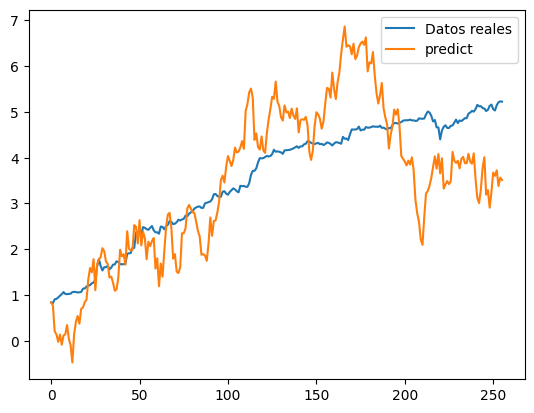

In [5]:
plt.plot(tiempo,datos)
plt.plot(tiempo,R)
plt.legend(['Datos reales','predict'])

In [6]:
a=op.x[0]
b=op.x[1]
sigma=op.x[2]
y0=datos[0]
T=1
N=len(datos)
d=1/365

def traouh (a,b,sigma,y0,N,d):
  x=np.zeros(N+1)
  x[0]=y0
  E=np.zeros(N)
  for i in range (0,N):
    E[i]=np.random.normal(0,1)
    x[i+1]=x[i]+a*(b-x[i])*d+sigma*np.sqrt(d)*E[i]
  return x

nsimul=100
m=np.zeros((N+1,nsimul))
for i in range(0,nsimul):
  m[0:,i]=traouh(a,b,sigma,y0,N,d)

In [7]:
import math

nsimul=100
med=np.zeros(N+1)

for i in range(0,N+1):
  sum=np.sum(m[i])
  med[i]=1/nsimul*sum

rm=np.zeros((N+1,nsimul))
var=np.zeros(N+1)

for k in range (0,N+1):
  acum=0
  for i in range(0,nsimul):
    resta=m[k,i]-med[k]
    rm[k,i]=resta*resta
    acum=acum+rm[k,i]
  var[k]=(1/(nsimul-1))*(acum)

ka=1.995
inf=np.zeros(N+1)
sup=np.zeros(N+1)
for j in range(0,N+1): 
  sqrt3=math.sqrt(var[j])
  inf[j]=med[j]-ka*sqrt3
  sup[j]=med[j]+ka*sqrt3

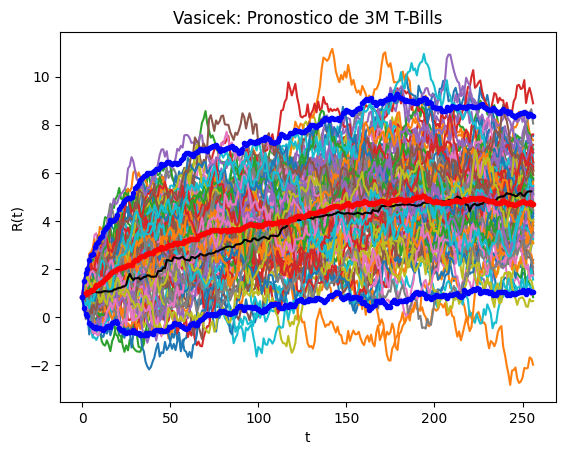

In [11]:
plt.plot(m)
plt.plot(tiempo,datos,color='k')
plt.plot(med,marker='o',markersize=3,color='red')
plt.plot(inf,marker='o',markersize=3,color='blue')
plt.plot(sup,marker='o',markersize=3,color='blue')
plt.xlabel('t')
plt.ylabel('R(t)')
plt.title('Vasicek: Pronostico de 3M T-Bills')
plt.savefig("Vasicek.jpg")